# 1.Loading Dataset

In [1]:
#importing Libraries
 
import pandas as pd
import string

In [2]:
# Load dataset
data = pd.read_csv('Text HAM SPAM calssification (1).csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,Your gonna have to pick up a $1 burger for you...


In [3]:
data.shape

(1791, 2)

In [4]:
#Class Distribution
data['Category'].value_counts(normalize=True)

ham     0.863268
spam    0.136732
Name: Category, dtype: float64

In [5]:
data.isnull().sum()

Category    65
Message      0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [9]:
data.shape

(1726, 2)

# 2.Pre-processing the Text data

In [10]:
# Import spacy
from spacy.lang.en import English

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

In [11]:
# Preprocessing function
def clean_text(text):
    ### lower case 
    cleaned = text.lower()
    
    ### remove punctuations
    punctuations = string.punctuation
    cleaned = "".join(character for character in cleaned if character not in punctuations)
    
    ### remove stopwords 
    my_doc = nlp(cleaned)
    token_list = []
    for token in my_doc:
        token_list.append(token.text)
    
    
    filtered_sentence =[] 

    for word in token_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word)
    
    ### Store cleaned document
    cleaned = filtered_sentence
    cleaned = " ".join(cleaned)
    
    return cleaned

In [12]:
# Applying the preprocessin function
data["cleaned"] = data["Message"].apply(lambda x : clean_text(x))
data.head()

,Category,Message,cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c
4,ham,Your gonna have to pick up a $1 burger for you...,gon na pick 1 burger way home nt pain killing


# 3. Creating Meta Features

In [13]:
# Number of words in original text
data["word_count"] = data["Message"].apply(lambda x : len(x.split()))

In [14]:
# Number of words in cleaned text
data["word_count_cleand"] = data["cleaned"].apply(lambda x : len(x.split()))

In [15]:
# Number of characters including spaces in the cleaned text
data["char_count"] = data["cleaned"].apply(lambda x : len(x))

In [16]:
# number of characters excluding spaces in the cleaned text
data["char_count_without_spaces"] = data["cleaned"].apply(lambda x : len(x.replace(" ","")))

In [17]:
# Number of digits in the cleaned text
data["num_dig"] = data["cleaned"].apply(lambda x :  sum([1 if w.isdigit() else 0 for w in x.split()]))

In [18]:
# Print dataset
data.head()

,Category,Message,cleaned,word_count,word_count_cleand,char_count,char_count_without_spaces,num_dig
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...,20,15,79,65,0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,6,6,23,18,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,28,22,131,110,3
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c,11,6,19,14,0
4,ham,Your gonna have to pick up a $1 burger for you...,gon na pick 1 burger way home nt pain killing,23,10,45,36,1


In [19]:
# Import spacy English language model
import spacy
nlp = spacy.load("en_core_web_sm")

In [20]:
# Dictionary of noun and verb POS tags
pos_dic = {"noun" : ["NNP", "NN", "NNS", "NNPS"], "verb" : ["VBZ", "VB", "VBD","VBG", "VBN"]}

In [21]:
# Function for noun and verb counts
def pos_check(txt, family):

    # spacy document
    txt = nlp(txt)
    
    all_tags = []

    # Get pos tag
    for w in txt:
        all_tags.append(w.tag_)
    
    count = 0

    # Count number of nouns and verbs
    for tag in all_tags:
        if tag in pos_dic[family]:
            count += 1

    return count

In [22]:
# Sample document: Noun count
pos_check("Mamata refuses to give speech at Netaji event after sloganee.", "noun")

5

In [23]:
# Sample document: verb count
pos_check("Mamata refuses to give speech at Netaji event after sloganee.", "verb")

2

In [24]:
# Applying the function
data["noun_count"] = data["cleaned"].apply(lambda x : pos_check(x, "noun"))
data["verb_count"] = data["cleaned"].apply(lambda x : pos_check(x, "verb"))

In [25]:
# Print output
data.head()

,Category,Message,cleaned,word_count,word_count_cleand,char_count,char_count_without_spaces,num_dig,noun_count,verb_count
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...,20,15,79,65,0,11,1
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,6,6,23,18,0,5,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,28,22,131,110,3,12,0
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c,11,6,19,14,0,6,0
4,ham,Your gonna have to pick up a $1 burger for you...,gon na pick 1 burger way home nt pain killing,23,10,45,36,1,3,2


# EDA

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
ham = data[data['Category']=='ham']
ham.head()

,Category,Message,cleaned,word_count,word_count_cleand,char_count,char_count_without_spaces,num_dig,noun_count,verb_count
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...,20,15,79,65,0,11,1
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,6,6,23,18,0,5,0
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c,11,6,19,14,0,6,0
4,ham,Your gonna have to pick up a $1 burger for you...,gon na pick 1 burger way home nt pain killing,23,10,45,36,1,3,2
5,ham,Ha ha ha good joke. Girls are situation seekers.,ha ha ha good joke girls situation seekers,9,8,42,35,0,4,0


In [28]:
spam = data[data['Category']=='spam']
spam.head()

,Category,Message,cleaned,word_count,word_count_cleand,char_count,char_count_without_spaces,num_dig,noun_count,verb_count
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,28,22,131,110,3,12,0
9,spam,"As a valued customer, I am pleased to advise y...",valued customer pleased advise following recen...,28,14,97,84,2,5,4
11,spam,Urgent UR awarded a complimentary trip to Euro...,urgent ur awarded complimentary trip eurodisin...,22,18,136,119,2,12,1
12,spam,"Did you hear about the new ""Divorce Barbie""? I...",hear new divorce barbie comes kens stuff,15,7,40,34,0,4,2
37,spam,Please call our customer service representativ...,customer service representative 0800 169 6031 ...,23,15,93,79,5,5,2


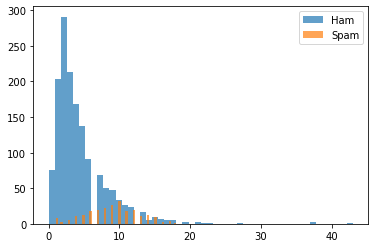

In [39]:
plt.hist(ham['noun_count'], bins = 50, alpha = 0.7, label='Ham')
plt.hist(spam['noun_count'], bins = 50, alpha = 0.7, label = 'Spam')
plt.legend()
plt.show()

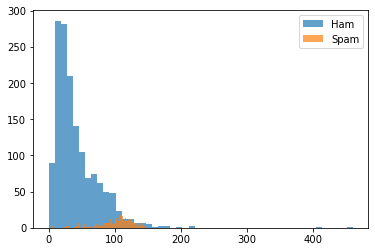

In [40]:
plt.hist(ham['char_count'], bins = 50, alpha = 0.7, label='Ham')
plt.hist(spam['char_count'], bins = 50, alpha = 0.7, label = 'Spam')
plt.legend()
plt.show()

In [30]:
!pip install wordcloud

You should consider upgrading via the 'c:\users\saikanth\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [31]:
from wordcloud import WordCloud

In [32]:
text = ' '.join(data['cleaned'])

In [33]:
len(text)

87704

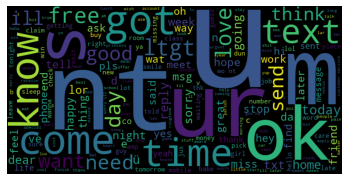

In [34]:
wc = WordCloud(width=800, height=400).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

# 4.Model Building with Meta Features

In [35]:
data['Category'].unique()

array(['ham', 'spam'], dtype=object)

In [36]:
data.isnull().sum()

Category                     0
Message                      0
cleaned                      0
word_count                   0
word_count_cleand            0
char_count                   0
char_count_without_spaces    0
num_dig                      0
noun_count                   0
verb_count                   0
dtype: int64

In [38]:
# Label encoding target variable
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
target = data['Category'].values

le.fit(target)
le.transform(target)


array([0, 0, 1, ..., 0, 0, 0])

In [41]:
# List of features
train = data[['word_count', 'word_count_cleand', 'char_count', 
              'char_count_without_spaces', 'num_dig', 'noun_count', 
              'verb_count']]

In [42]:
# Train-Validation split
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train, target, random_state=20, stratify=target)

In [43]:
# Train and Validatio dataset
(x_train.shape, y_train.shape), (x_valid.shape, y_valid.shape)

(((1294, 7), (1294,)), ((432, 7), (432,)))

In [45]:
# Naive bayes
from sklearn import naive_bayes

In [46]:
# Multinomial naive bayes
model = naive_bayes.MultinomialNB()

In [47]:
# Fit model on training data
model.fit(x_train, y_train)

MultinomialNB()

In [48]:
# Prediction on training data
pred_train = model.predict(x_train)
# Prediction on validation data
pred_valid = model.predict(x_valid)

In [64]:
# Accuracy, confusion Matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
# Training accuracy
accuracy_score(y_train, pred_train)

0.9505409582689336

In [52]:
# Validation accuracy
accuracy_score(y_valid, pred_valid)

0.9444444444444444

In [53]:
confusion_matrix(y_valid, pred_valid)

array([[361,  12],
       [ 12,  47]], dtype=int64)

# 5.Model Building with Tf-Idf and Meta features

In [55]:
# Import Tf-Idf Vectoriser
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
# Tf-Idf Vectoriser
word_tfidf = TfidfVectorizer(max_features=500)

In [57]:
# Fit Tf-Idf Vectoriser
word_tfidf.fit(data["cleaned"].values)

TfidfVectorizer(max_features=500)

In [58]:
# Transform
word_vectors_tfidf = word_tfidf.transform(data["cleaned"].values)

In [59]:
# Tf-Idf vectors
word_vectors_tfidf

<1726x500 sparse matrix of type '<class 'numpy.float64'>'
	with 7065 stored elements in Compressed Sparse Row format>

In [60]:
# Combining meta features and Tf-Idf features
from scipy.sparse import hstack, csr_matrix

# List of meta features
meta_features = ['word_count', 'word_count_cleand',
       'char_count', 'char_count_without_spaces', 'num_dig', 'noun_count',
       'verb_count']

# Meta features
feature_set1 = data[meta_features]

# Combined features
train = hstack([word_vectors_tfidf, csr_matrix(feature_set1)], "csr")

### splitting data into train and test

In [61]:
# Train and Validation datasets
x_train, x_valid, y_train, y_valid = train_test_split(train, target, random_state=20, stratify=target)

In [62]:
# Train and Validation datasets
(x_train.shape, y_train.shape), (x_valid.shape, y_valid.shape)

(((1294, 507), (1294,)), ((432, 507), (432,)))

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


In [69]:
hyperparameters = {
    
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
    
}

In [70]:
clf = GridSearchCV(model, hyperparameters, n_jobs=-1, cv = None)

In [71]:
%%time
clf.fit(x_train, y_train)

Wall time: 2.32 s


GridSearchCV(estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]})

In [72]:
clf.best_estimator_

MultinomialNB(alpha=0.01)

In [73]:
clf.best_score_

0.9752716171320823

In [75]:
y_pred = clf.predict(x_valid)

In [76]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.98      0.98       373
        spam       0.86      0.93      0.89        59

    accuracy                           0.97       432
   macro avg       0.92      0.95      0.94       432
weighted avg       0.97      0.97      0.97       432



In [77]:
confusion_matrix(y_valid, y_pred)

array([[364,   9],
       [  4,  55]], dtype=int64)

# Model Building Using Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
model_lg = LogisticRegression(solver = 'liblinear') 

In [81]:
hyperparameters_lg = {
    'penalty': ('l2', 'l1'),
    'C': (1,2)
}

In [82]:
clf = GridSearchCV(model_lg, hyperparameters_lg, n_jobs=-1, cv = None)

In [83]:
clf.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': (1, 2), 'penalty': ('l2', 'l1')})

In [84]:
clf.best_estimator_

LogisticRegression(C=2, solver='liblinear')

In [85]:
clf.best_params_

{'C': 2, 'penalty': 'l2'}

In [86]:
clf.best_score_

0.9721768279907815

In [87]:
y_pred = clf.predict(x_valid)

In [88]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       373
        spam       0.91      0.86      0.89        59

    accuracy                           0.97       432
   macro avg       0.94      0.93      0.93       432
weighted avg       0.97      0.97      0.97       432



In [89]:
confusion_matrix(y_valid, y_pred)

array([[368,   5],
       [  8,  51]], dtype=int64)

# Model Building Using SVM

In [96]:
from sklearn.svm import SVC

In [97]:
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyperparameter_svc={'kernel':kernel,'C':C,'gamma':gamma}

In [100]:
clf = GridSearchCV(SVC(),hyperparameter_svc, n_jobs=-1, cv = 5)

In [101]:
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7,
                               0.8, 0.9, 1],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0],
                         'kernel': ['rbf', 'linear']})

In [102]:
clf.best_params_

{'C': 0.4, 'gamma': 0.1, 'kernel': 'linear'}

In [103]:
clf.best_score_

0.9744994163598815

In [104]:
y_pred = clf.predict(x_valid)

In [105]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       373
        spam       0.91      0.88      0.90        59

    accuracy                           0.97       432
   macro avg       0.95      0.93      0.94       432
weighted avg       0.97      0.97      0.97       432



In [106]:
confusion_matrix(y_valid, y_pred)

array([[368,   5],
       [  7,  52]], dtype=int64)

In [107]:
accuracy_score(y_valid, y_pred)

0.9722222222222222

# Testing Every Machine learning model

In [111]:
!pip install pytest

You should consider upgrading via the 'c:\users\saikanth\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [109]:
!pip install lazypredict

You should consider upgrading via the 'c:\users\saikanth\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [118]:
from lazypredict.Supervised import LazyClassifier

In [119]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

In [128]:
type(y_valid)

numpy.ndarray

In [129]:

models, predictions = clf.fit(x_train, x_valid, y_train, y_valid)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:15<00:00,  1.96it/s]


In [130]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.97,0.93,None,0.97,0.35
PassiveAggressiveClassifier,0.94,0.93,None,0.95,0.21
LinearSVC,0.95,0.93,None,0.95,0.74
BernoulliNB,0.95,0.92,None,0.95,0.15
AdaBoostClassifier,0.96,0.91,None,0.96,0.98
XGBClassifier,0.97,0.91,None,0.97,2.33
ExtraTreesClassifier,0.97,0.91,None,0.97,0.93
ExtraTreeClassifier,0.95,0.91,None,0.95,0.10
CalibratedClassifierCV,0.97,0.90,None,0.96,2.89
